In [9]:
import cv2
import os
import re
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import csv
import pandas as pd
import keras
from keras import models,Model
from keras.layers import Dense,GaussianNoise, Dropout,Input
%matplotlib inline
from skimage.feature import hog

In [10]:
dataSet = []
person = []
horiSet = []

count = 0
folder = "/home/jeet/ML face images train"
for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
#         print(img)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (200,200))
        fd, img = hog(img,visualise=True)
        img = np.ravel(img)
        if img is not None:
            numbers = re.findall('\d+',filename)
            numbers = list(map(int,numbers))
            person.append(numbers[0])
            horiSet.append(img.T)
            dataSet.append(img)
            count = count + 1
           
        
dataSet_test = []
person_test = []
horiSet_test = []

folder = "/home/jeet/ML face images test"
for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (200, 200))
        fd, img = hog(img, visualise=True)
        img = np.ravel(img)
        if img is not None:
            numbers = re.findall('\d+',filename)
            numbers = list(map(int,numbers))
            person_test.append(numbers[0])
            horiSet_test.append(img.T)
            dataSet_test.append(img)
            count = count + 1

/home/jeet/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [11]:
#Getting data in desired format and mapping the lables
dataSet = np.array(dataSet)
train = pd.DataFrame(dataSet)

person = np.array(person)
train['id'] = person.transpose()

unique_person = train['id']
unique_person = np.array(unique_person)
unique_person = np.unique(unique_person)
key = range(len(unique_person))

roll_dict = dict( zip(unique_person, key))

mapped_roll = np.vectorize(roll_dict.get)(person)
train['id'] = mapped_roll.transpose()

y = train['id'].values.astype('int64')
images = train.drop(['id'], axis=1, inplace=False)
x = (images.values).astype('uint8')

X_train = x
Y_train = y

dataSet_test = np.array(dataSet_test)
test = pd.DataFrame(dataSet_test)

person_test = np.array(person_test)
test['id'] = person_test.transpose()
print(test)

mapped_roll_test = np.vectorize(roll_dict.get)(person_test)
test['id'] = mapped_roll_test.transpose()

y_test = test['id'].values.astype('int64')
images = test.drop(['id'], axis=1, inplace=False)
x_test = (images.values).astype('uint8')

X_test = x_test
Y_test = y_test

       0    1    2    3    4    5    6    7    8    9    ...      39991  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...        0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...        0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...        0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...        0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...        0.0   
5    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...        0.0   
6    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...        0.0   
7    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...        0.0   
8    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...        0.0   
9    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...        0.0   
10   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...        0.0   
11   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    ...        0.0   
12   0.0  0.0  0.0  0.0  

In [15]:
from sklearn import svm


print("Training Started...")
clf = svm.SVC(kernel="linear", C=100.0, gamma ="auto") #initialising the svm #classifier
#clf = svm.SVC(gamma=0.001, C = 100)
clf.fit(X_train,Y_train) #fitting and training

print( "Training Finished...")

Training Started...
Training Finished...


In [16]:
score = clf.score(X_test, Y_test)

In [17]:
score

0.6857142857142857

In [32]:
img = cv2.imread('1744003O_anger.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, (200,200))
fd, img = hog(img,visualise=True)
img = np.ravel(img)
clf.predict(img.reshape(1,40000))
# img.shape

/home/jeet/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


array([15])

/home/jeet/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


array([8])

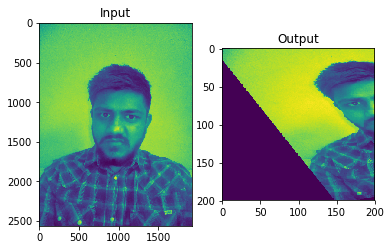

In [42]:
img = cv2.imread('1744003O_anger1.jpg')
rows,cols,ch = img.shape
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# img = cv2.resize(img, (200,200))

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
dst = cv2.resize(dst, (200,200))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
fd, dst = hog(dst,visualise=True)
clf.predict(dst.reshape(1,40000))